<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *7*: *Imbalanced Classification & NN***

### **Tenggat Waktu: 8 Mei 2024, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Mei 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [3]:
# Isi dengan data diri Anda
NAMA = "Farrel Ayman"
KELAS = "A"
NPM = "2206828916"
USERNAME_KAGGLE = "farrelayman"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [4]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Farrel Ayman dari kelas A dengan NPM 2206828916, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Farrel Ayman)


# Import Library

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone

# Imbalanced Classification

Selama ini kita mempelajari metode klasifikasi dengan asumsi bahwa *dataset* yang digunakan untuk *training* seimbang. Artinya, distribusi kelas pada dataset cenderung sama. Distribusi kelas disini mengacu kepada jumlah data pada masing-masing kelas. Namun, ternyata distribusi kelas yang sama sangat jarang ditemui pada dunia nyata. Misalnya, pada sebuah problem klasifikasi apakah sebuah email spam (positif) atau tidak (negatif), email yang normal pasti lebih sering didapatkan dibanding yang spam. Ini mengakibatkan dataset yang digunakan lebih banyak distribusinya pada kelas email normal dibanding yang spam. Hal ini menyebabkan performa klasifikasi lebih terpengaruh oleh kelas yang lebih banyak **(kelas mayoritas)** padahal sebenarnya kita ingin melakukan klasifikasi pada kelas yang sedikit **(kelas minoritas)**. Dalam konteks contoh tadi, maka jika diberi sebuah email baru, model klasifikasi akan cenderung mengklasifikasikannya sebagai email yang normal **(kelas mayoritas)**.

Nah, pada lab kali ini kita akan mempelajari ***imbalanced classification***, dimana distribusi antar kelasnya tidak sama pada dataset training yang digunakan. Berdasarkan tingkat signifikansi keseimbangannya, terdapat 2 jenis imbalanced classification, yaitu:
1. Slight Imbalance: Distribusi antar kelas pada dataset training yang tidak terlalu jauh berbeda (4:6)
2. Severe Imbalance: Distribusi antar kelas pada dataset training yang lumayan jauh berbeda (1:100 atau lebih)

Perlu diperhatikan bahwa severe imbalance akan sangat mempengaruhi performa dari model klasifikasi, sehingga harus dilakukan penyeimbangan pada dataset terlebih dahulu antara kelas mayoritas dan minoritas.
Untuk mengatasi hal masalah imbalanced ini, langkah yang harus dilakukan adalah di antaranya adalah:
- Menambah sampel data pada kelas minoritas ***(Oversampling)***
, atau
- Mengurangi sampel data pada kelas mayoritas ***(Undersampling)***

Untuk mensimulasikan sebuah dataset yang imbalance, kita dapat menggunakan method `make_classification` dari library `scikit-learn`.
Berikut merupakan contoh dataset yang slight imbalance dan severe imbalance.

#### Slight Imbalance
Perbandingan data pada kelas mayoritas dan minoritas adalah 6:4

In [6]:
# Mensimulasikan dataset slight imbalance
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6], # ratio 4:6
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_slight = Counter(y_slight)
print(counter_y_slight)

Counter({0: 6000, 1: 4000})


#### Severe Imbalance
Perbandingan data pada kelas mayoritas dan minoritas adalah 99:1

In [7]:
# Mensimulasikan dataset slight imbalance
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.99], # ratio 99:1
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_severe = Counter(y_severe)
print(counter_y_severe)

Counter({0: 9900, 1: 100})


#### Visualisasi scatter plot slight imbalance dan severe imbalance dataset

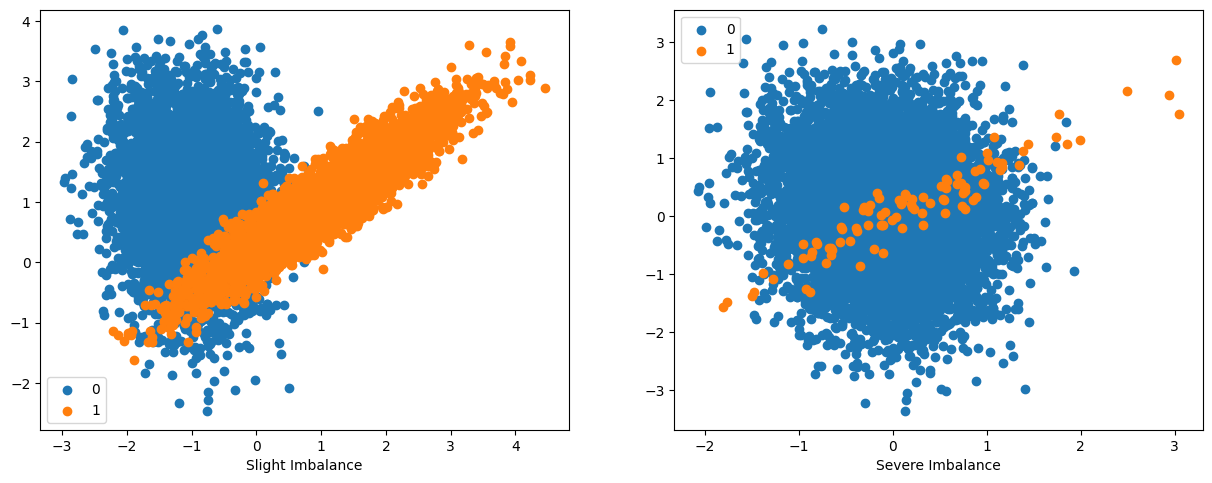

In [8]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.xlabel('Slight Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_slight == label)[0]
    plt.scatter(X_slight[row_ix, 0], X_slight[row_ix, 1], label=str(label))
    plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Severe Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_severe == label)[0]
    plt.scatter(X_severe[row_ix, 0], X_severe[row_ix, 1], label=str(label))
    plt.legend()

plt.show()

Terlihat dengan jelas perbedaan slight imbalance dan severe imbalance pada visualisasi scatter plot di atas. Perbandingan jumlah data pada kelas mayoritas dan kelas minoritas pada severe imbalance dataset lebih besar (99:1) daripada slight imbalance dataset (6:4).

## Pengaruh Imbalance Dataset Terhadap Performa Model Klasifikasi

Imbalance dataset akan berpengaruh kepada performa model klasifikasi yang digunakan.
Kita akan menggunakan model Decision Tree dan mengevaluasi model tersebut untuk dataset slight imbalance dan severe imbalance menggunakan beberapa metriks evaluasi. Perhatikan contoh di bawah untuk memahami lebih lanjut.

1. Evaluasi Model Decision Tree Dengan Slight Imbalance Dataset

#### Metode Cross Validation
Evaluasi model di bawah ini akan menggunakan Stratified K-Fold Cross Validation dengan beberapa metrik evaluasi di antaranya: accuracy, f1 (macro), precision (macro), recall (macro).

Disini data - data sintetis hasil penambahan oversampling akan dilibatkan dalam evaluasi model, maka dari itu kita menggunakan Stratified K-Fold Cross Validation. Stratified K-Fold Cross Validation membagi dataset menjadi sejumlah k fold dataset, dimana k fold dataset itu dibagi menjadi training dan validation test dataset. Pada Stratified K-Fold Cross Validation, distribusi kelas pada setiap fold akan dibuat seproporsional mungkin, sehingga folds yang merupakan validation test dataset akan memiliki distribusi kelas yang hampir sama.

In [9]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9240999999999999
f1_macro score: 0.9197149733708393
precision_macro score: 0.9194729075281579
recall_macro score: 0.9203333333333333


2. Evaluasi Model Decision Tree Dengan Severe Imbalance Dataset

In [10]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9832000000000001
f1_macro score: 0.5403892334370877
precision_macro score: 0.5487214735659712
recall_macro score: 0.5460606060606061


Berdasarkan hasil evaluasi model di atas, bisa dilihat bahwa akurasi dari kedua dataset sangat tinggi. Dapat kita ingat lagi bahwa metriks akurasi dipengaruhi oleh semua prediksi yang benar, baik itu kelas yang mau kita prediksi di awal (positif) atau yang bukan (negatif). Pada slight imbalance, skor akurasi dan skor metriks - metriks lainnya tidak berbeda secara signifikan. Hal ini terjadi karena model klasifikasi memperoleh informasi yang cukup dari kedua buah kelas walaupun terdapat sedikit perbedaan distribusi kelas. Akibatnya, model bisa memprediksi dengan cukup baik pada kelas minoritasnya. Namun, pada severe imbalance dataset, skor recall, precision, dan f1 score jauh lebih rendah dibanding skor akurasi yang berarti model hanya akurat dalam memprediksi kelas secara keseluruhan, tetapi kurang akurat dalam memprediksi kelas minoritas. Dalam konteks imbalance dataset yang dimana kelas minoritas adalah kelas yang ingin diprediksi (positif), kita tidak bisa menggunakan metriks akurasi sebagai acuan performa model. Kelas mayoritas akan sangat mempengaruhi performa model, sehingga informasi yang didapatkan dari kelas minoritas terabaikan.

Salah satu contoh dunia nyata dari dataset dengan kelas minoritas yang ingin diprediksi adalah email yang spam dan tidak spam. Tujuan kita membuat model pada konteks permasalahan tersebut adalah dengan tepat memprediksi email spam yang masuk sebagai email spam. Namun, karena email spam jumlah datanya sedikit pada dataset (kelas minoritas), metriks akurasi tidak disarankan dipakai untuk mengevaluasi model klasifikasi dari contoh tersebut. Akurasi yang tinggi pada model klasifikasi di contoh tersebut bisa saja akibat dari banyaknya email yang non spam yang masuk yang diprediksi benar sebagai non spam. Walaupun cuman ada 5% email spam yang masuk dan anggaplah model kita gagal memprediksi semua email tersebut sebagai email spam, akurasi model kita juga tetap tinggi di angka 95%. Namun, jika kita menggunakan metriks f1 score, maka evaluasi model hanya akan mempertimbangkan email spam yang diprediksi benar sebagai email spam saja, sehingga lebih relevan dengan tujuan awal model dibuat.

![Imbalance Dataset Accuracy vs F1 Score](https://i.imgflip.com/8dfrug.jpg)

*Sumber: https://imgflip.com/i/8dfrug*


Selanjutnya, kita akan menggunakan **dataset severe imbalance** untuk mempelajari masing-masing tipe dari penanganan imbalance dataset

In [11]:
X = X_severe
y = y_severe

In [12]:
# Jalankan method ini yang berguna untuk memvisualisasikan dataset yang sudah disimulasikan
def show_simulated_dataset(X, y):
    counter_y = Counter(y)
    plt.figure(figsize=(12, 10))

    for label, _ in counter_y.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
        plt.legend()
    plt.show()

In [13]:
# Jalankan method ini yang berguna untuk memvisualisasikan perbandingan dua buat dataset
def show_simulated_dataset_comparison(X1, X2, y1, y2, title1='Original dataset', title2='Sampling Dataset'):
    counter_y1 = Counter(y1)
    counter_y2 = Counter(y2)
    plt.figure(figsize=(15, 12))
    plt.subplot(2,2,1)
    plt.xlabel(title1)

    for label, _ in counter_y1.items():
        row_ix = where(y1 == label)[0]
        plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))
        plt.legend()

    plt.subplot(2,2,2)
    plt.xlabel(title2)

    for label, _ in counter_y2.items():
        row_ix = where(y2 == label)[0]
        plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
        plt.legend()

    plt.show()

## Oversampling

Oversampling berarti **menambah sampel data yang berasal dari kelas minoritas pada dataset**. Secara metode penambahan data, oversampling dapat dibedakan menjadi 2 tipe, yaitu penduplikasian data dan pembuatan data sintetik.

Salah satu metode penduplikasian data adalah **random oversampling**, sedangkan contoh metode pembuatan data sintetik antara lain:
- Synthetic Minority Oversampling Technique (SMOTE),
- Borderline-SMOTE,
- Borderline Oversampling with SVM, dan
- Adaptive Synthetic Sampling (ADASYN).

Selanjutnya, kita akan menelusuri definisi sederhana serta implementasi kelima metode oversampling tersebut dalam dataset simulasi kita. Untuk penjelasan lebih lengkapnya, Anda dapat membaca kembali slide perkuliahan atau mencari referensi lain melalui internet.   

### Random Oversampling

Random undersampling merupakan metode penambahan data yang berada pada kelas minoritas yang dilakukan dengan menduplikasikan data yang sudah ada secara acak. Data - data baru hasil penduplikasian ini tidak akan menambah informasi baru kepada dataset.

Counter({0: 9900, 1: 9900})


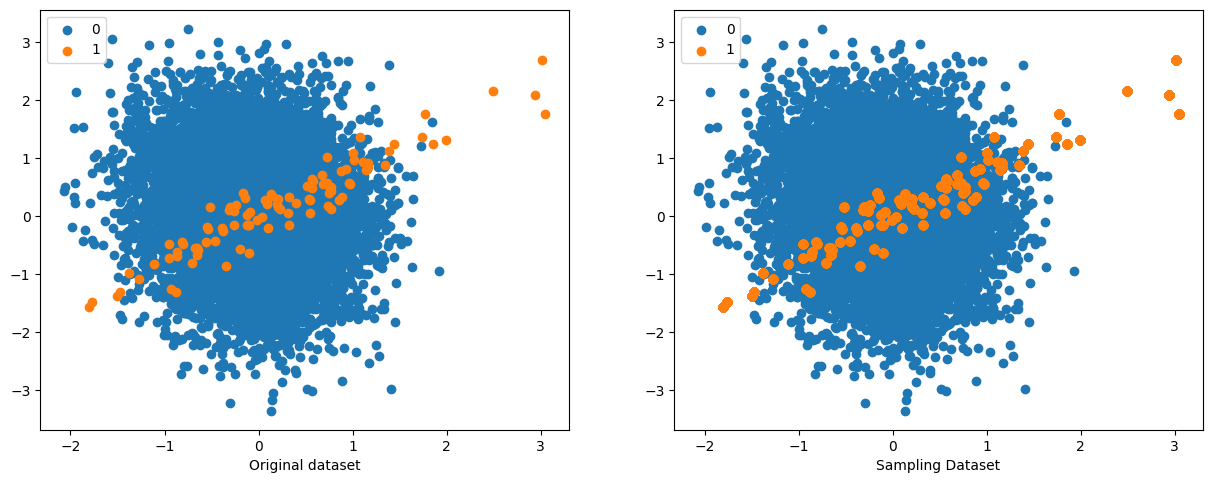

In [14]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling berdasarkan dataset simulasi
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_rand_over, y1=y, y2=y_rand_over)

Sekilas tidak ada perbedaan antara dataset asli dan dataset yang telah dilakukan random oversampling. Hal ini terjadi karena data pada kelas minoritas diduplikasikan pada titik yang sama, sehingga menghasilkan data data baru yang tertumpuk pada titik yang sama. Maka dari itu, tidak terlihat perbedaan antara dataset asli dan dataset sampling.

### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE membentuk data baru dengan menggabungkan data pada kelas minoritas dengan data tetangganya. Data baru yang dihasilkan akan berada pada garis yang menghubungkan data asli pada kelas minoritas.

![SMOTE](https://i.ibb.co/MV143tn/Screenshot-2024-04-23-132339.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

Counter({0: 9900, 1: 9900})


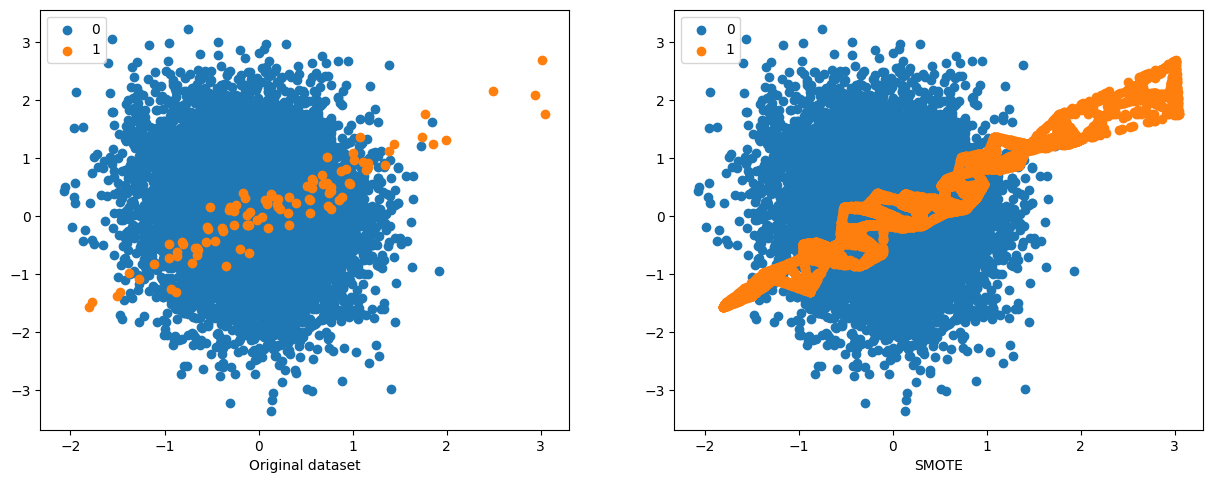

In [15]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling berdasarkan dataset simulasi
X_smote, y_smote = smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_smote,
                                  y1=y, y2=y_smote,
                                  title2='SMOTE')

### Borderline-SMOTE

Variasi dari metode SMOTE yang hanya memperbanyak data sintetis pada data pada kelas minoritas yang *missclassified* sebagai kelas mayoritas, misal dengan menggunakan K-nearest neighbor model. Data - data pada kelas mintoritas yang *missclassified* ini berdekatan dengan data - data pada kelas mayoritas.  

Counter({0: 9900, 1: 9900})


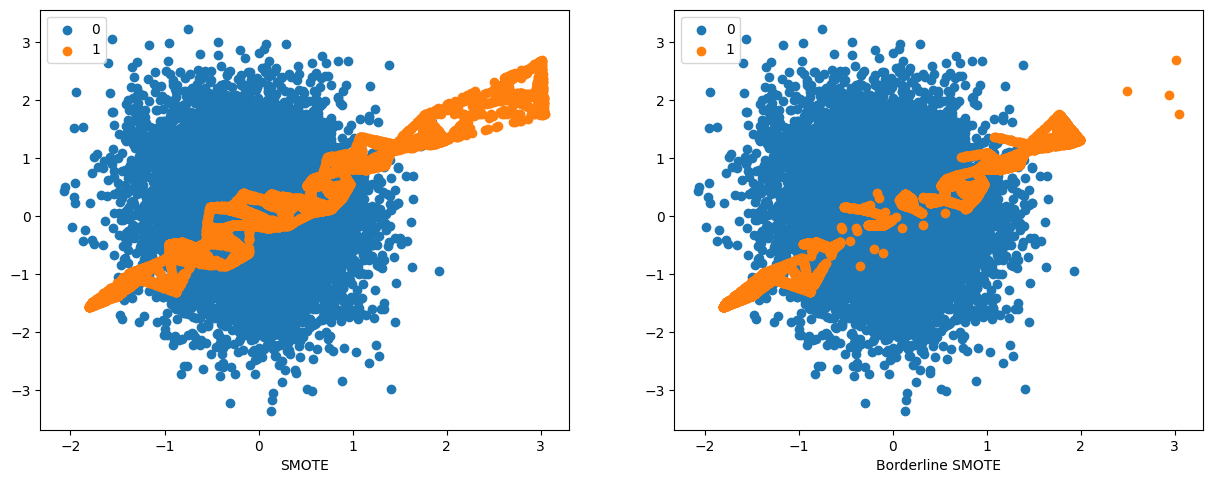

In [16]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling berdasarkan dataset simulasi
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

# Perbandingan scatter plot antara dataset SMOTE dan dataset Borderline SMOTE
show_simulated_dataset_comparison(X1=X_smote, X2=X_borderline_smote,
                                  y1=y_smote, y2=y_borderline_smote,
                                  title1='SMOTE', title2='Borderline SMOTE')

### Borderline Oversampling with SVM

Dibandingkan menggunakan KNN model untuk melakukan preklasifikasi data minoritas yang akan dioversampling, metode ini menggunakan algoritma Support Vector Machine (SVM).

Counter({0: 9900, 1: 9900})


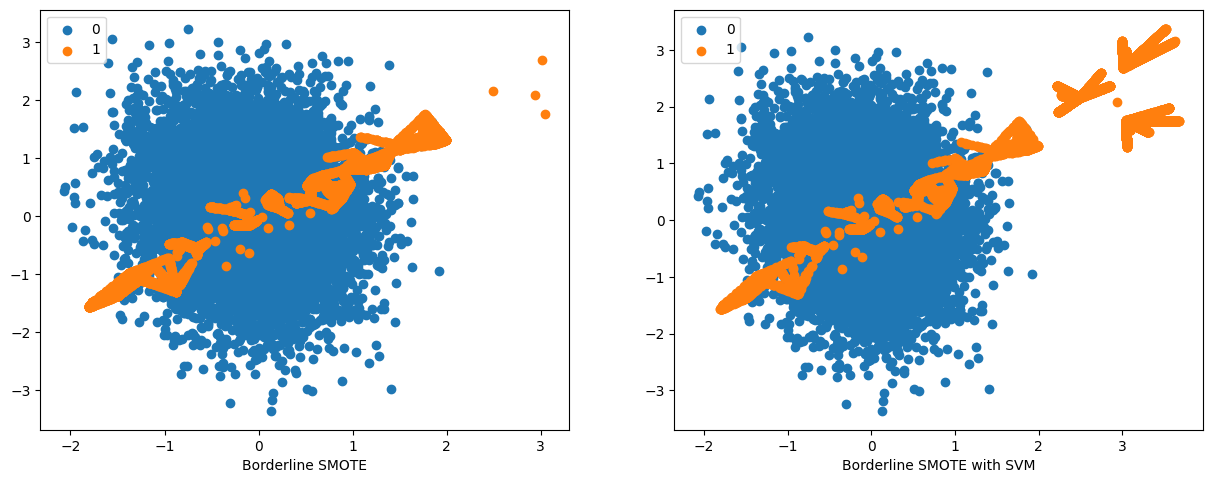

In [17]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling berdasarkan dataset simulasi
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

# Perbandingan scatter plot antara dataset Borderline SMOTE dan dataset Borderline SMOTE with SVM
show_simulated_dataset_comparison(X1=X_borderline_smote, X2=X_svm_smote,
                                  y1=y_borderline_smote, y2=y_svm_smote,
                                  title1='Borderline SMOTE', title2='Borderline SMOTE with SVM')

### Adaptive Synthetic Sampling (ADASYN)

Pendekatan lain yang melibatkan pembuatan sampel data sintetik yang berbanding terbalik dengan jumlah sampel data di kelas minoritas. Artinya, menghasilkan lebih banyak data sintetik di wilayah ruang fitur yang jumlah data pada kelas minoritasnya rendah, dan lebih sedikit atau tidak ada sama sekali jika jumlah data pada kelas minoritasnya banyak.

Counter({1: 9925, 0: 9900})


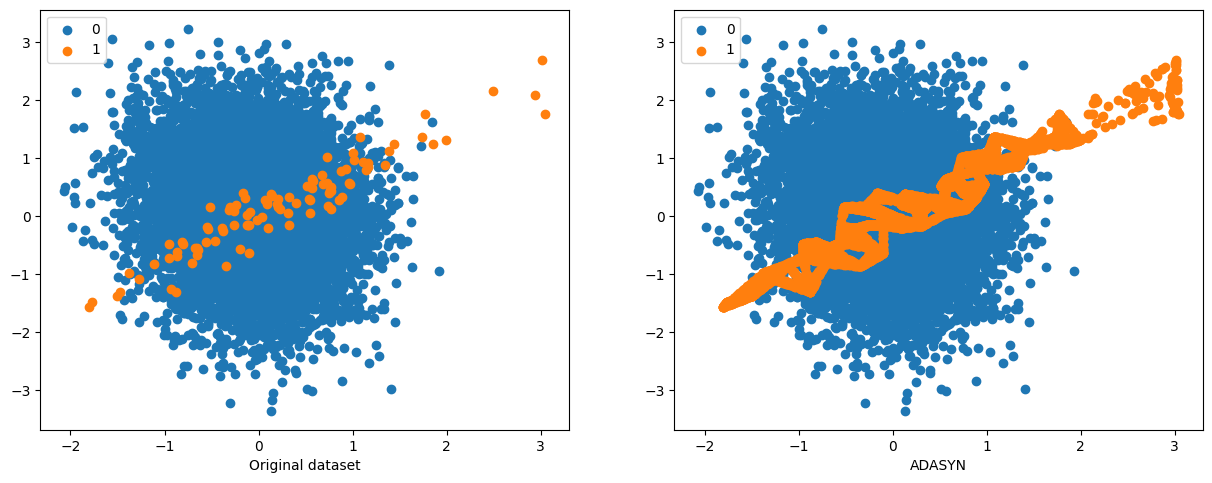

In [18]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling berdasarkan dataset simulasi
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_adasyn,
                                  y1=y, y2=y_adasyn,
                                  title2='ADASYN')

## Undersampling

Undersampling merupakan **mengurangi data yang berasal dari kelas mayoritas**. Tujuannya adalah sama seperti oversampling, yaitu untuk menyeimbangkan distribusi kelas pada dataset. Beberapa metode undersampling di antaranya:
- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link Undersampling.

Mari kita telusuri satu per satu ketiga metode undersampling di atas dengan memberikan definisi sederhana dan implementasi langsungnya menggunakan dataset simulasi yang sudah ada.

### Random Undersampling

Random undersamplng akan melakukan pengambilan sampel acak dari kelas mayoritas dan menghapusnya dari dataset.

Counter({0: 100, 1: 100})


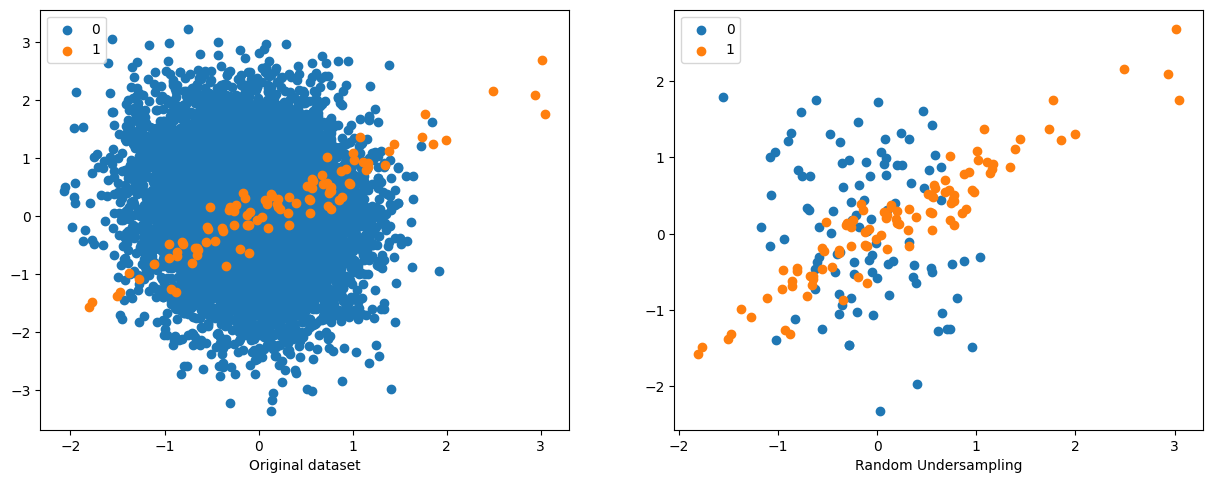

In [19]:
# Definisi ADASYN class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling berdasarkan dataset simulasi
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_rand_under,
                                  y1=y, y2=y_rand_under,
                                  title2='Random Undersampling')

### Near Miss Undersampling

Near Miss mengacu pada metode undersampling yang memilih sampel data berdasarkan jarak data pada kelas mayoritas ke data pada kelas minoritas.Terdapat tiga versi penerapan Near Miss, di antaranya:

#### NearMiss-1

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga sampel kelas minoritas terdekat.

Counter({0: 100, 1: 100})


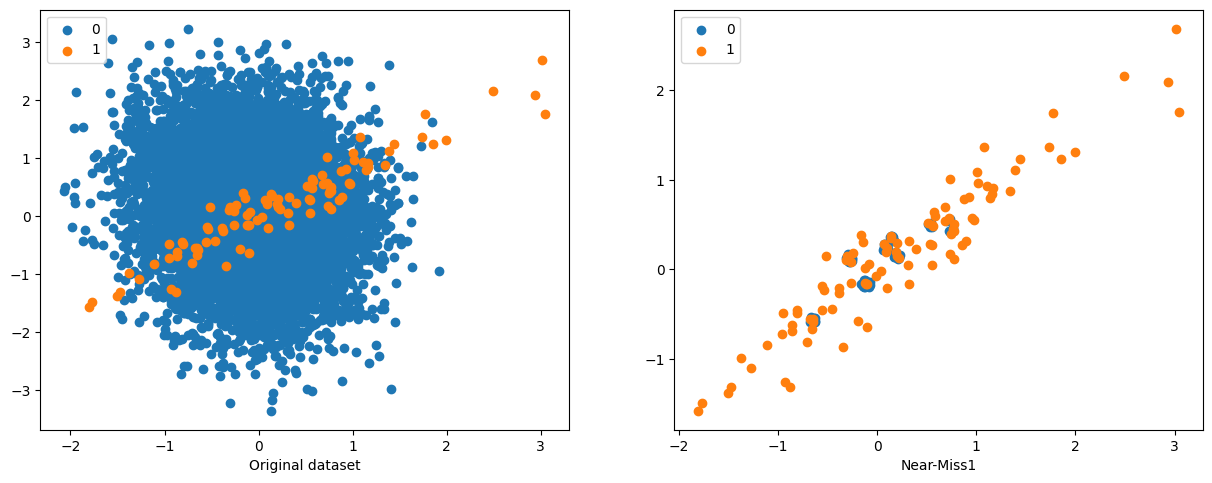

In [20]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling berdasarkan dataset simulasi
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss1
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss,
                                  y1=y, y2=y_nearmiss,
                                  title2='Near-Miss1')

#### NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terbesar ke tiga sampel kelas minoritas terdekat.

Counter({0: 100, 1: 100})


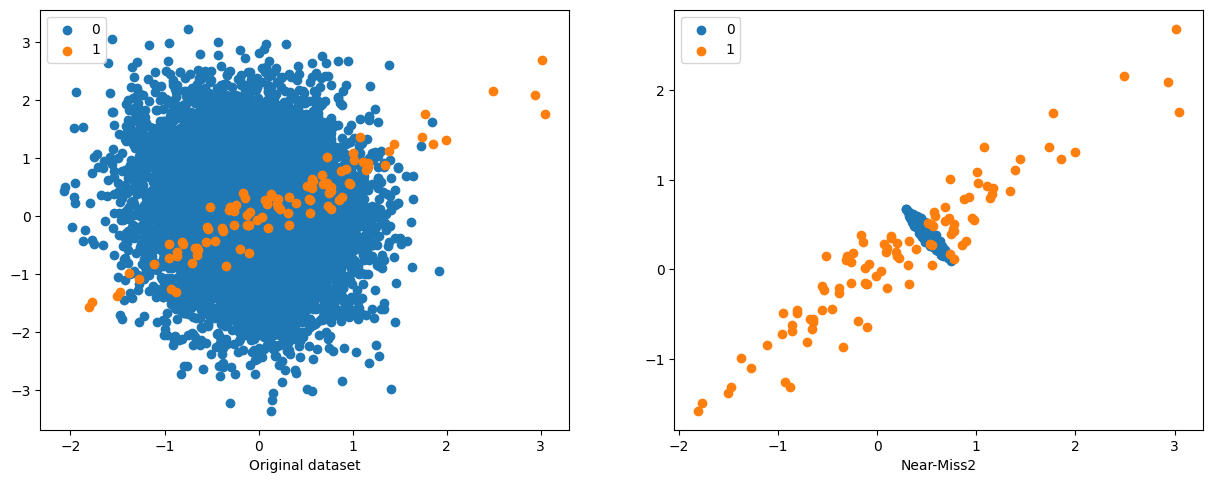

In [21]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss2
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss2,
                                  y1=y, y2=y_nearmiss2,
                                  title2='Near-Miss2')

#### NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

Counter({0: 100, 1: 100})


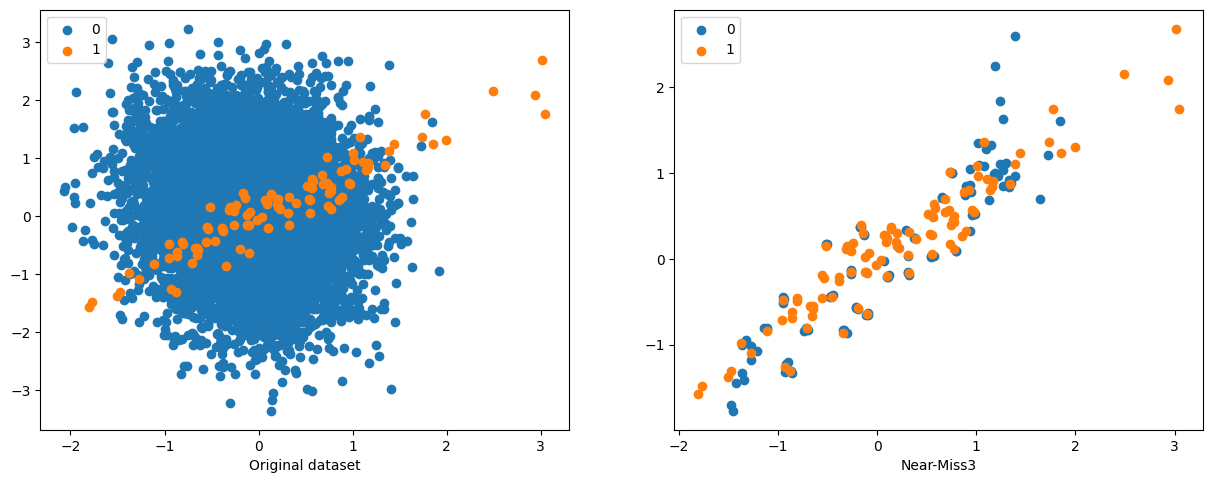

In [22]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling berdasarkan dataset simulasi
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss3
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss3,
                                  y1=y, y2=y_nearmiss3,
                                  title2='Near-Miss3')

#### Tomek Link Undersampling

Tomek Link undersampling akan menghapus sampel kelas mayoritas yang merupakan **Tomek Link**, dimana sampel a dan b dikatakan Tomek Link jika:
1. Nearest neighbor sampel a adalah b,
2. Nearest neighbor sampel b adalah a, dan
3. Sampel a dan b berada pada kelas yang berbeda.

Counter({0: 9847, 1: 100})


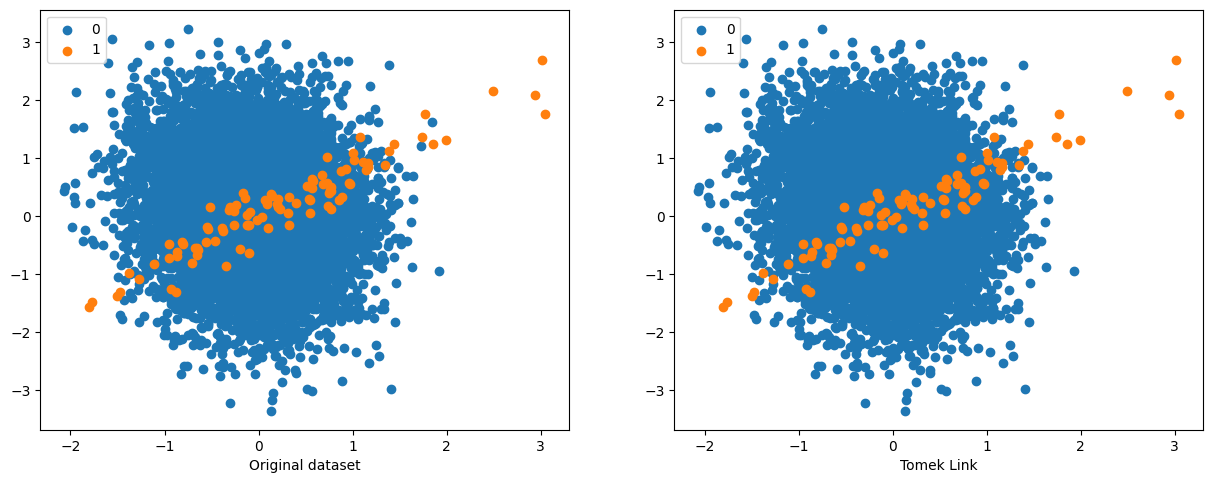

In [23]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling berdasarkan dataset simulasi
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

# Perbandingan scatter plot antara dataset asli dan dataset Tomek Link
show_simulated_dataset_comparison(X1=X , X2=X_tomek,
                                  y1=y, y2=y_tomek,
                                  title2='Tomek Link')

Tomek Link hanya menghapus sedikit sampel kelas mayoritas yang berada pada borderline karena harus memenuhi ketiga syarat di atas tadi

## Cost Sensitive Learning

Dalam kasus *imbalance classification*, seperti mendeteksi email spam atau mengidentifikasi penipuan, setiap jenis kesalahan prediksi bisa memiliki konsekuensi yang berbeda-beda. Misalnya, salah mengklasifikasikan email penting sebagai spam bisa menjadi lebih buruk daripada membiarkan beberapa email spam masuk ke kotak masuk. Ini karena dampak dari kesalahan *false negative* (misalnya, melewatkan email penting) lebih besar daripada *false positive* (misalnya, menyaring email yang sebenarnya tidak spam).

Untuk menangani hal ini, ada pendekatan yang disebut cost-sensitive learning yang memperhitungkan perbedaan dalam biaya atau dampak dari kesalahan klasifikasi. Sebagai contoh, jika kita berbicara tentang kasus pembobolan bank, biaya dari tidak mendeteksi kasus penipuan bisa sangat besar. Dalam situasi seperti itu, kita ingin model kita lebih fokus pada mendeteksi kasus-kasus penipuan, bahkan jika itu berarti mengorbankan tingkat akurasi umum.

Cost-sensitive learning bisa dilakukan dengan beberapa cara. Salah satunya adalah dengan menyesuaikan kembali bobot dari sampel data untuk memperhitungkan ketidakseimbangan distribusi kelas. Misalnya, kita bisa memberi bobot lebih besar pada kelas minoritas. Metode lain melibatkan algoritma yang secara eksplisit memperhitungkan biaya kesalahan selama proses pembelajaran. Ada juga teknik yang menggunakan kombinasi dari model untuk meminimalkan biaya kesalahan secara keseluruhan.

Kali ini kita akan mempelajari cost-sensitive learning pada Decision Tree

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan *cost sensitive algorithm* sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

Pertama, mari kita evaluasi model tanpa menggunakan pembobotan kelas

In [24]:
# Definisi model
model_1 = DecisionTreeClassifier()
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model_1, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9827
f1_macro score: 0.5435913042792597
precision_micro score: 0.9831
precision_macro score: 0.5446836595820951
recall_micro score: 0.9823999999999999
recall_macro score: 0.525909090909091


Setelah itu, lakukan evaluasi pada model decision tree yang diberikan pembobotan pada masing-masing kelasnya. Dalam kasus ini, kita akan memberikan bobot 1:99 untuk perbandingan kelas mayoritas dan kelas minoritas. Kelas minoritas memiliki bobot yang lebih tinggi.

In [25]:
# Definisi bobot dan model
weights = {0:1, 1:99}
model_1 = DecisionTreeClassifier(class_weight=weights)

In [26]:
model_2 = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model_2, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9838999999999999
f1_macro score: 0.5695800522418726
precision_micro score: 0.9843
precision_macro score: 0.5756637851257692
recall_micro score: 0.984
recall_macro score: 0.5565656565656566


Perhatikan skor makronya, model kedua memberikan hasil skor yang sedikit lebih baik dibanding dengan model pertama.

# Neural Network

Neural Network merupakan sebuah algoritma dalam machine learning yang bekerja mirip dengan neuron di dalam otak manusia. NN terdiri dari sejumlah neuron (unit). Salah satu jenis dari NN adalah Multi Layer Perceptron (MLP), dimana MLP terdiri dari perceptron yang disusun menjadi beberapa layer. Untuk mendapatkan gambaran mengenai NN, khususnya MLP, mari kita lihat ilustrasi di bawah ini

![Multi Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

*Sumber: A Guide for Using Deep Learning for Complex Trait Genomic Prediction - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_fig1_334609713*

MLP memiliki struktur dasar yang terdiri dari tiga jenis layer:

- Input layer: Layer pertama yang memiliki neuron sebanyak jumlah fitur dalam dataset.
- Hidden Layer: Layer yang berada di antara input layer dan output layer. Hasil dari hidden layer ini akan menjadi vektor input untuk output layer atau hidden layer berikutnya.
- Output Layer: Layer yang menentukan hasil klasifikasi. Pada kasus binary classification, kita hanya membutuhkan satu neuron pada output layer karena hasilnya hanya ada 2 kemungkinan, yaitu 0 atau 1.

Tiap neuron di dalam hidden layer memiliki dua elemen, yaitu bobot (weight) dan bias. Setiap input akan dikalikan dengan bobotnya, kemudian hasilnya akan dijumlahkan. Di samping itu, terdapat juga nilai bias yang merupakan konstanta tertentu. Setelah proses penjumlahan selesai, hasilnya akan dimasukkan ke dalam fungsi aktivasi, yang nantinya akan menghasilkan keluaran (output).

Terdapat beberapa jenis fungsi aktivasi yang bisa dilihat pada ilustrasi di bawah ini
![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Pada lab kali ini, kita akan menggunakan MLPClassifier yang telah tersedia pada library `scikit-learn` untuk menyelesaikan problem *binary classification* pada dataset simulasi yang sudah ada.

Kita akan membuat sebuah model MLPClassifier yang memiliki 2 hidden layer dimana masing-masing layer memiliki 30 dan 10 neuron berturut-turut. Fungsi aktivasi yang akan digunakan adalah Rectified Linear Unit (RelU)

In [27]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [28]:
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902000000000001
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902000000000001
precision_macro score: 0.6950990495247624
recall_micro score: 0.9902000000000001
recall_macro score: 0.51


Skor F1 pada model tersebut tidak terlalu baik yang mungkin diakibatkan karena dataset yang *imbalance*. Hal ini dapat diatasi dengan penggunaan Pipeline dimana kita menggunakan pengetahuan kita sebelumnya tentang metode sampling pada imbalance classification.

# Pipeline

Pipeline dalam machine learning adalah serangkaian langkah yang dilakukan secara berurutan untuk memproses data dan membangun model. Setiap langkah dalam pipeline mungkin melibatkan pemrosesan data, seperti pemisahan fitur dan label, normalisasi data, atau bahkan metode sampling untuk menangani ketidakseimbangan dalam data. Setelah data diproses, langkah selanjutnya biasanya adalah membangun model machine learning, seperti MLP (Multi-Layer Perceptron) untuk melakukan klasifikasi atau prediksi.

![Machine Learning Pipeline](https://i.ibb.co/rpVFqnt/Screenshot-2024-04-23-161850.png)

Dalam konteks *imbalance classification* menggunakan MLP, pipeline akan memiliki dua langkah utama, yaitu oversampling/undersampling dilanjutkan dengan klasifikasi menggunakan MLPClassifier:

Kita akan membuat pipeline yang melakukan 2 steps:
1. Melakukan oversampling menggunakan metode Borderline SMOTE with SVM pada dataset
2. Melakukan prediksi menggunakan MLPClassifier yang sudah didefinisikan di atas

In [29]:
# Membuat pipeline
steps = [('over', SVMSMOTE()), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9155
f1_macro score: 0.5306357333794623
precision_micro score: 0.9124000000000001
precision_macro score: 0.5265256563522202
recall_micro score: 0.9198999999999999
recall_macro score: 0.6782323232323233


Bisa dilihat bahwa skor makro F1 dari model MLPClassifier yang dimasukan ke dalam pipeline tersebut lebih tinggi dari MLPClassifier biasa tanpa menggunakan pipeline

# Soal

## Deskripsi Dataset

Dataset yang digunakan pada untuk lab kali ini adalah data kegagalan mesin. Kolom yang akan diprediksi pada dataset ini adalah `Machine failure` dengan 2 kelas yang berbeda, yaitu `0` untuk tidak gagal dan `1` untuk gagal. Dataset ini memiliki 9.815 sampel, 9.529 di antaranya merupakan merin yang tidak gagal `(Machine failure=0)`, sedangkan 286 di antaranya merupakan mesin yang gagal (`Machine failure=1`). Ini menunujukkan bahwa dataset ini termasuk dalam kategori *severe imbalance dataset*.

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/ikjotsingh221/machine-failure-cleaned/data

In [31]:
# Membuka dataset dan menampilkannya
csv_url = 'https://raw.githubusercontent.com/farrelayman09/lab-kasdad-7/master/machine_failure_cleaned.csv'

df = pd.read_csv(csv_url)
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0


In [32]:
# Menampilkan Informasi keseluruhan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


## 1. DATA PREPROCESSING [20]

a) [5] Buatlah sebuah dataset baru yang terdiri dari kolom `Rotational speed [rpm]` dan kolom `Torque [Nm]` sebagai fitur-fiturnya (X) dan kolom `Machine failure` sebagai target (y).
<br>**revisi**: Rotational speed [rpm] dan Torque [Nm] menjadi Torque [Nm] dan Tool wear [min]

In [33]:
X, y = df[['Torque [Nm]','Tool wear [min]']].values, df['Machine failure'].values
print(isinstance(X, np.ndarray))
print(isinstance(y, np.ndarray))

True
True


b) [3] Hitung dan tampilkan jumlah sampel pada kelas mayoritas dan kelas minoritas pada dataset yang baru dibuat.

In [34]:
target = Counter(y)
target

Counter({0: 9529, 1: 286})

c) [2] Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

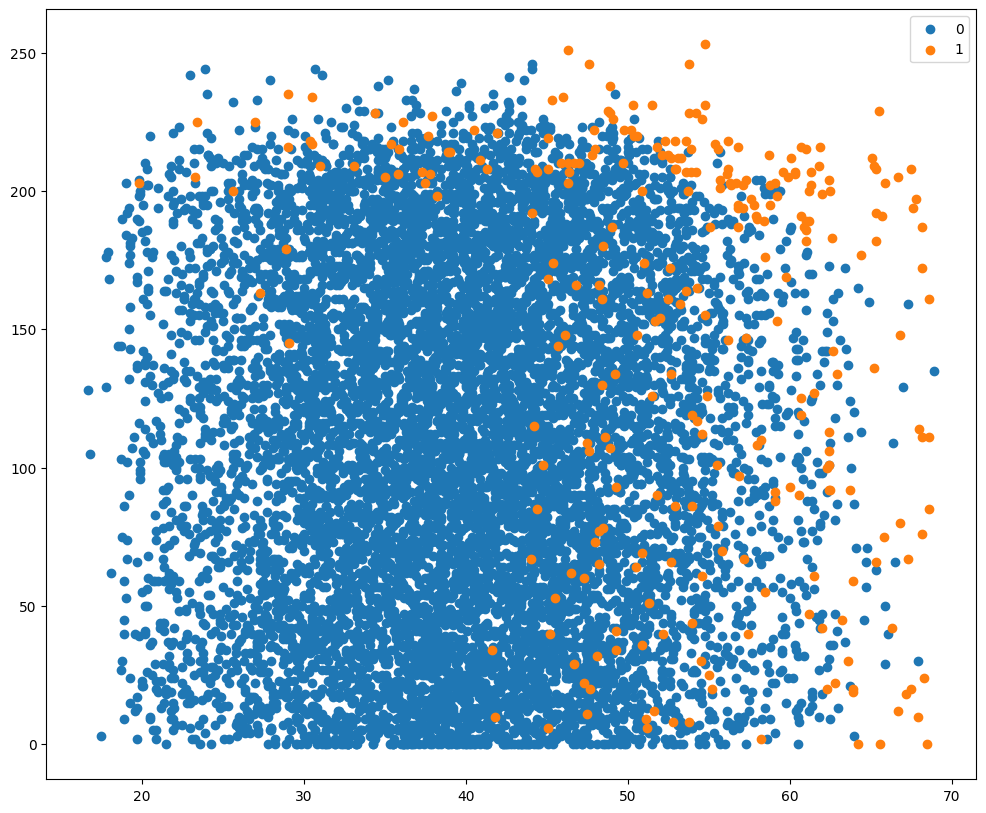

In [35]:
plt.figure(figsize=(12, 10))

for label, _ in target.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  plt.legend()

plt.show()

d) [10] Penggunaan Stratified K-Fold cross validation tidak selalu menunjukkan hasil evaluasi yang sesuai dengan konteks dunia nyata. Hal ini disebabkan oleh validation test dataset yang dibuat cenderung seimbang oleh karena tambahan data - data sintetis (oversampling). Pada dunia nyata, biasanya test dataset  lebih cenderung tidak seimbang. Contohnya, pada keseharian kita, email yang masuk pasti lebih banyak email yang tidak spam daripada yang spam. Oleh karena keterbatasan stratified k-fold cross validation dalam meng-handle hal tersebut, kita akan melengkapi method yang menggunakan k-fold cross validation biasa untuk evaluasi modelnya.

Lengkapi method di bawah ini dimana method ini menerima parameter - parameter berikut:

`model`: model yang akan digunakan untuk dilatih dan dievaluasi\
`X`: kumpulan kolom fitur pada dataset yang akan digunakan\
`y`: label/kelas pada dataset\
`resample_method`: metode resample (oversampling/undersampling) yang akan digunakan\
`n_splits`: banyaknya fold yang akan dipakai pada evaluasi menggunakan k-fold cross validation \

In [36]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method, n_splits=5):
    # TODO: Gunakan K-fold biasa dengan fold sebanyak parameter n_splits (Ubah None menjadi jawaban)
    kf = KFold(n_splits, shuffle=True, random_state=42)


    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list
    all_scores = list()

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]


        # TODO: Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # TODO: Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample
        model_clone.fit(X_train_sampled, y_train_sampled)

        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        # TODO: Gunakan metrik makro
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        scores = [accuracy, f1, precision, recall]
        all_scores.append(scores)


    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {accuracy}')
    print(f'Mean F1-score (macro): {f1}')
    print(f'Mean Precision (macro): {precision}')
    print(f'Mean Recall (macro): {recall}')

    return accuracy, f1, precision, recall

Jalankan sel di bawah ini untuk mengecek apakah implementasi methodmu sudah benar atau belum. Jika masih terdapat `AssertionError` atau error lainnya, maka implementasi method masih salah

In [37]:
import sys

clf_test = DecisionTreeClassifier()

resample_method = SMOTE()

mean_accuracy, mean_f1, mean_precision, mean_recall = train_and_evaluate_with_oversampling(clf_test, X, y, resample_method)

expected_mean_accuracy = 0.9115639327559858
expected_mean_f1_score = 0.5904853179472209
expected_mean_precision = 0.579936334077073
expected_mean_recall = 0.7363274113393764

# Tolerance 0.05
assert abs(mean_accuracy - expected_mean_accuracy) <= 0.05, f"Mean Accuracy is not within tolerance: {mean_accuracy}"
assert abs(mean_f1 - expected_mean_f1_score) <= 0.05, f"Mean F1-score is not within tolerance: {mean_f1}"
assert abs(mean_precision - expected_mean_precision) <= 0.05, f"Mean Precision is not within tolerance: {mean_precision}"
assert abs(mean_recall - expected_mean_recall) <= 0.05, f"Mean Recall is not within tolerance: {mean_recall}"

Mean scores across all folds:
Mean Accuracy: 0.9062659195109526
Mean F1-score (macro): 0.6098798074845979
Mean Precision (macro): 0.5830647141892307
Mean Recall (macro): 0.7070420703059241


## 2. OVERSAMPLING [30]

a) [3] Terapkan metode oversampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 1</i></b> : <br>
Random oversampling

Counter({0: 9529, 1: 9529})


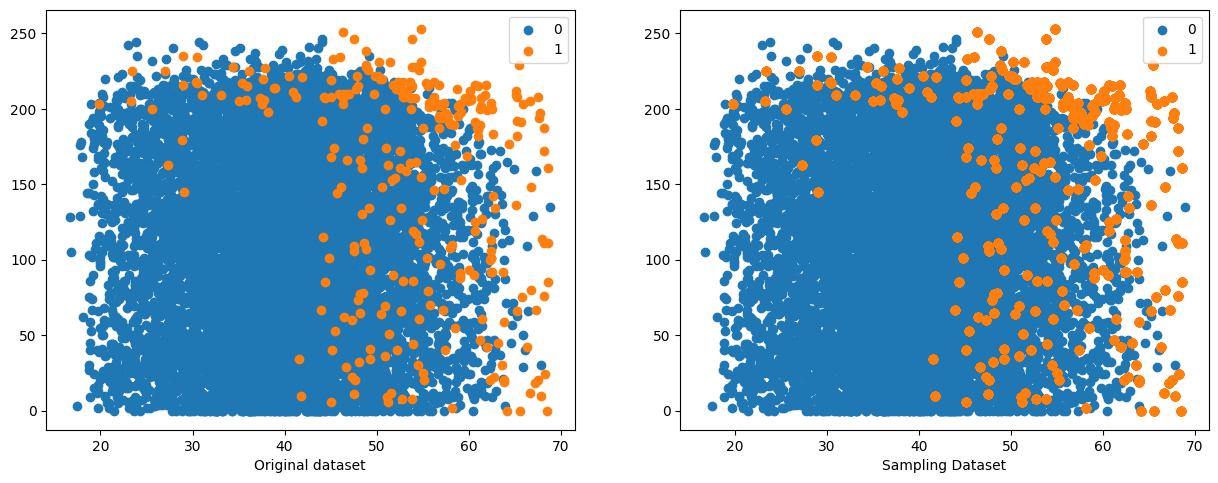

In [48]:
# Definisi random oversampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling berdasarkan dataset simulasi
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_rand_over, y1=y, y2=y_rand_over)

b) [3] Terapkan metode oversampling yang lain yang telah dipelajari pada lab
ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 2</i></b> : <br>
SMOTE

Counter({0: 9529, 1: 9529})


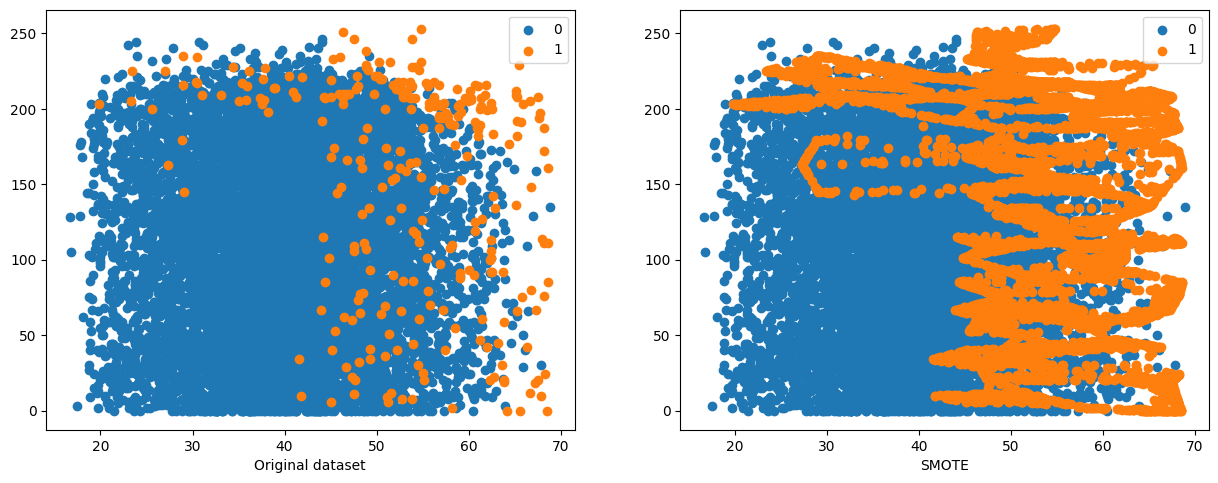

In [49]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling berdasarkan dataset simulasi
X_smote, y_smote = smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_smote,
                                  y1=y, y2=y_smote,
                                  title2='SMOTE')

c) [5] Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (2a) dan (2b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi!  

> <b><i>Jawaban</i></b> : <br>
Perbedaan yang terlihat dari kedua hasil resampling adalah letak persebaran titik dataset. Terlihat bahwa random oversampling terlihat tidak berubah, padahal sekarang kedua kelas (0 dan 1) memiliki proporsi yang sama. Hal ini terjadi karena data pada kelas minoritas diduplikasikan pada titik yang sama. Sementara itu, dataset menggunakan SMOTE terlihat lebih tersebar karena SMOTE membentuk data baru dengan menggabungkan data pada kelas minoritas dengan data tetangganya. Data baru yang dihasilkan akan berada pada garis yang menghubungkan data asli pada kelas minoritas sehingga membuat dataset lebih tersebar dibandingkan random oversampling.

d) [7] Buatlah dua buah model decision tree yang menerima dataset pada soal (1a). Lakukan evaluasi model menggunakan cross validation jenis K-fold biasa dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

Dua model decision tree memiliki kriteria sbb:
- Model pertama menggunakan metode pada soal (2a) untuk oversampling training dataset di setiap iterasi cross validation
- Model kedua menggunakan metode pada soal (2b) untuk oversampling training dataset di setiap iterasi cross validation

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

<details>
<summary>HINT!!</summary>

## Perhatikan soal (1d) :D
# </details>

In [58]:
classifier1 = DecisionTreeClassifier()
classifier2 = DecisionTreeClassifier()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

print('Random Oversampling')
scoring = ['f1_macro', 'f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(classifier1, X_rand_over, y_rand_over, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

print('')
print('SMOTE')
scoring = ['f1_macro', 'f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(classifier2, X_smote, y_smote, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

Random Oversampling
f1_macro score: 0.9878237166960366
f1_micro score: 0.9879840154542423

SMOTE
f1_macro score: 0.9134672229635437
f1_micro score: 0.9139476271675051


e) [4] Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

f) [3] Buatlah sebuah model decision tree yang menerima dataset dari model dengan skor f1 makro tertinggi di soal (2d). Misalnya, jika model pertama memiliki skor tertinggi, maka dataset (X dan y) yang dipakai diambil dari soal (2a). Namun, jika model kedua memiliki skor tertinggi, maka dataset (X dan y) yang dipakai dimabil dari soal (2b). Setelah itu, lakukan evaluasi model menggunakan cross validation jenis **Stratified k-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya.


In [59]:
classifier1 = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print('Random Oversampling')
scoring = ['f1_macro', 'f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(classifier1, X_rand_over, y_rand_over, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

Random Oversampling
f1_macro score: 0.9880871933821191
f1_micro score: 0.9877215895996649


g) [5] Skor f1 manakah yang lebih tinggi antara evaluasi model terbaik di soal (2d) atau (2f) secara makro maupun mikro? Berikan penjelasan jawaban Anda untuk kedua metrik makro dan mikro!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

## 3. UNDERSAMPLING [20]

a) [3] Terapkan metode undersampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 1</i></b> : <br>
Random Undersampling

Counter({0: 286, 1: 286})


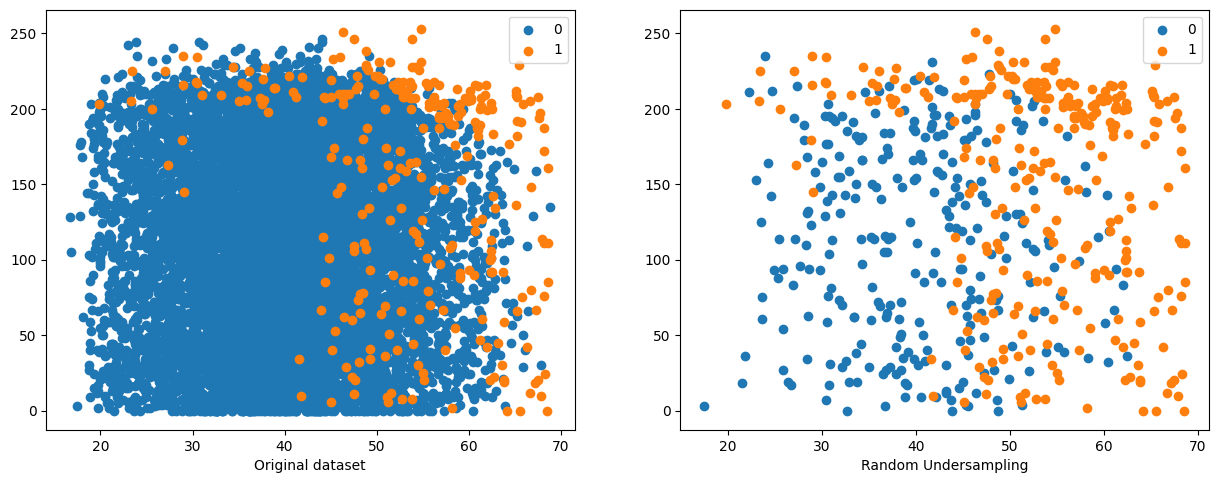

In [50]:
# Definisi Random class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling berdasarkan dataset simulasi
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_rand_under,
                                  y1=y, y2=y_rand_under,
                                  title2='Random Undersampling')

b) [3] Terapkan metode undersampling yang lain yang telah dipelajari pada lab
ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 2</i></b> : <br>
Near Miss 1

Counter({0: 286, 1: 286})


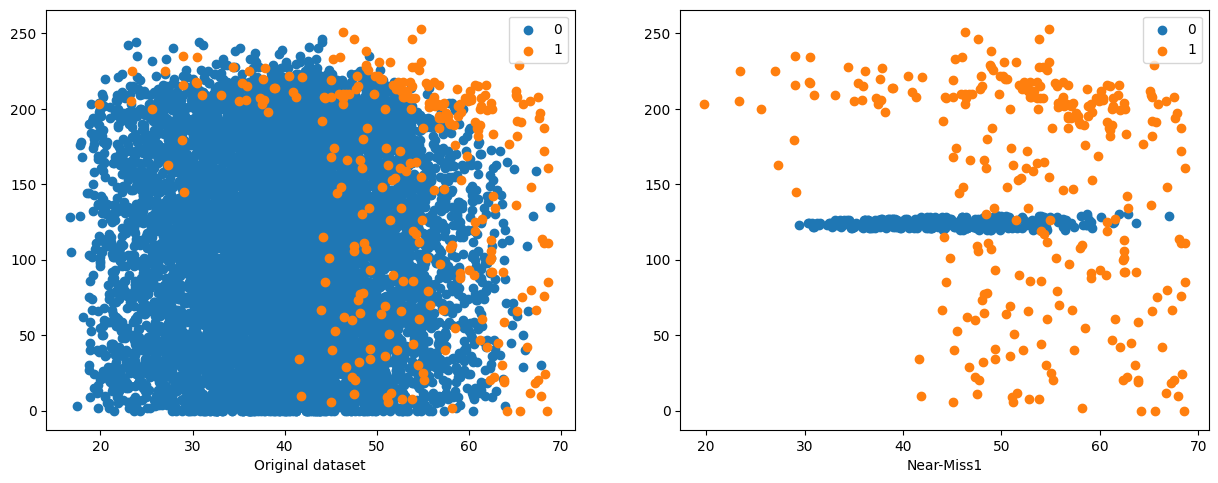

In [62]:
# Definisi Near Miss 2 class
nearmiss = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss1
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss,
                                  y1=y, y2=y_nearmiss,
                                  title2='Near-Miss1')

c) [5] Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (2a) dan (2b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi!

> <b><i>Jawaban</i></b> : <br>
Perbedaan yang terlihat dari kedua hasil resampling adalah letak persebaran titik dataset. Terlihat bahwa random undersampling lebih tersebar dibandingkan near-miss undersampling. Hal ini terjadi karena data pada kelas mayoritas dihapus secara acak sampai kelasnya memiliki proporsi yang sama. Sementara itu, nearmiss 2 memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga sampel kelas minoritas terjauh sehingga terlihat bahwa data mayoritas yang di-resample terletak saling berdekatan dan relatif sedikit menjauh dari kelompok minoritas.

d) [4] Buatlah dua buah model decision tree yang menerima dataset pada soal (2a) dan (2b) berturut - turut. Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

In [76]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print('Random Undersampling')
scoring = ['f1_macro', 'f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_rand_under, y_rand_under, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

print("")
print('Nearmiss 2')
scoring = ['f1_macro', 'f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_nearmiss, y_nearmiss, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

Random Undersampling
f1_macro score: 0.7495442153437393
f1_micro score: 0.7431121281464531

Nearmiss 2
f1_macro score: 0.9824812557116882
f1_micro score: 0.9824866514111366


e) [5] Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

## 4. COST-SENSITIVE LEARNING [15]

a) [3] Buatlah sebuah model decision tree yang menerima dataset soal (1a). Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [66]:
# Definisi model
model1 = DecisionTreeClassifier()
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_macro','f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(model1, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_macro score: 0.6784987541855282
f1_micro score: 0.9638308711156395


b) [5] Apakah ada perbedaan terhadap skor f1 makro dan mikronya? Jelaskan!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

c) [3] Buatlah sebuah model decision tree dengan pembobotan yang menerima dataset soal (1a). Gunakan bobot (weight) sebesar 2:1 untuk perbandingan kelas mayoritas dan minoritas. Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

In [71]:
# Definisi bobot dan model
weights = {0:2, 1:1}

model_2 = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_macro','f1_micro']
for i in range(len(scoring)):
  score = cross_val_score(model_2, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_macro score: 0.6805555360142265
f1_micro score: 0.9628120224146715


d) [5] Bagaimana perbedaan skor f1 mikro pada model nomor soal (4a) dan (4c) di atas? Jelaskan hubungan skor f1 makro dengan bobot yang diberikan pada model yang lebih besar pada kelas mayoritas!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

## 5. NEURAL NETWORK WITH PIPELINE [25]

a) [3] Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 30, dan 10 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.001
- Menggunakan stochastic gradient descent sebagai algoritma pencari nilai weight dan bias

In [53]:
# Membuat classifier MLP
classifier1 = MLPClassifier(
    hidden_layer_sizes=(50,30,10),
    activation='relu',
    learning_rate_init=0.001,
    solver='sgd',
)

b) [3] Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 50 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.01
- Menggunakan adam sebagai algoritma pencari nilai weight dan bias

In [54]:
# Membuat classifier MLP
classifier2 = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    learning_rate_init=0.01,
    solver='adam',
)

c) [4] Evaluasi kedua model tersebut memakai dataset soal (1a) dengan menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [55]:
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro']

print('classifier1')
for i in range(len(scoring)):
  score = cross_val_score(classifier1, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

print("")
print('classifier1')
for i in range(len(scoring)):
  score = cross_val_score(classifier2, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")


classifier1
f1_micro score: 0.9708609271523179
f1_macro score: 0.5178786219914101

classifier1
f1_micro score: 0.9730005094243506
f1_macro score: 0.5482901067036989


d) [4] Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (4c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!  

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

e) [3] Dengan menggunakan Pipeline, evaluasi sebuah model menggunakan cross validation dengan jenis **Stratified K-fold** yang melakukan oversampling dataset memakai metode SVMSMOTE terlebih dahulu sebelum dataset masuk ke model MLPClassifier. Gunakan model MLPClassifier yang memiliki skor f1 makro tertinggi dari soal (4a) dan (4b)

In [46]:
# Membuat pipeline
steps = [('over', SVMSMOTE()), ('model', classifier2)]
pipeline = Pipeline(steps=steps)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.89587366276108
f1_macro score: 0.5769261475717544
precision_micro score: 0.9274579724910851
precision_macro score: 0.5807693965106987
recall_micro score: 0.8649006622516555
recall_macro score: 0.7834846712713176


f) [3] Dengan menggunakan Pipeline, evaluasi sebuah model yang melakukan undersampling dataset menggunakan Random undersampling terlebih dahulu sebelum dataset masuk ke model MLPClassifier. Gunakan model MLPClassifier yang memiliki skor f1 makro tertinggi dari soal (4a) dan (4b)

In [74]:
# Membuat pipeline
steps = [('under', RandomUnderSampler(sampling_strategy='majority')),
 ('model', classifier2)]
pipeline = Pipeline(steps=steps)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.7776872134488029
f1_macro score: 0.5085260414387732
precision_micro score: 0.7574121242995415
precision_macro score: 0.5378075878160737
recall_micro score: 0.7455934793683137
recall_macro score: 0.7558196923275291


g) [5] Berdasarkan skor metrik evaluasi model pada soal (4e) dan (4f), jelaskan pengaruh pemilihan metode resampling antara oversampling atau undersampling terhadap model MLPClassifier! Apakah pemilihan tersebut juga berpengaruh kepada model - model klasifikasi lainnya?  

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

# KAGGLE COMPETITION

Dalam rangka menerapkan pemahaman kalian pada materi imbalance classification dan neural network, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Imbalance Classification Dan Neural Network](https://www.kaggle.com/competitions/klasifikasi-lab-7)

In [47]:
# Lakukan pengerjaan kaggle competition di sini

# -- SELESAI --